# Finding Heavy Traffic Indicators on I-94
## Introduction
We're going to analyze a dataset about the westbound traffic on the [I-94 Interstate highway](https://en.wikipedia.org/wiki/Interstate_94).

John Hogue made the dataset available, and you can download it from the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Metro+Interstate+Traffic+Volume).

The goal of our analysis is to determine a few indicators of heavy traffic on I-94. These indicators can be weather type, time of the day, time of the week, etc. For instance, we may find out that the traffic is usually heavier in the summer or when it snows.

## The I-94 Traffic Dataset

As the first step, let's read the `Metro_Interstate_Traffic_Volume.csv` file using Pandas. Then, we'll examine a few rows and use `DataFrame.info()` to find more information about the dataset.

In [48]:
import pandas as pd

i_94 = pd.read_csv('Metro_Interstate_Traffic_Volume.csv')
i_94.head()

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
0,None,288.28,0.0,0.0,40,Clouds,scattered clouds,2012-10-02 09:00:00,5545
1,None,289.36,0.0,0.0,75,Clouds,broken clouds,2012-10-02 10:00:00,4516
2,None,289.58,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 11:00:00,4767
3,None,290.13,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 12:00:00,5026
4,None,291.14,0.0,0.0,75,Clouds,broken clouds,2012-10-02 13:00:00,4918


In [49]:
i_94.tail()

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
48199,None,283.45,0.0,0.0,75,Clouds,broken clouds,2018-09-30 19:00:00,3543
48200,None,282.76,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 20:00:00,2781
48201,None,282.73,0.0,0.0,90,Thunderstorm,proximity thunderstorm,2018-09-30 21:00:00,2159
48202,None,282.09,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 22:00:00,1450
48203,None,282.12,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 23:00:00,954


In [50]:
i_94.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48204 entries, 0 to 48203
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   holiday              48204 non-null  object 
 1   temp                 48204 non-null  float64
 2   rain_1h              48204 non-null  float64
 3   snow_1h              48204 non-null  float64
 4   clouds_all           48204 non-null  int64  
 5   weather_main         48204 non-null  object 
 6   weather_description  48204 non-null  object 
 7   date_time            48204 non-null  object 
 8   traffic_volume       48204 non-null  int64  
dtypes: float64(3), int64(2), object(4)
memory usage: 3.3+ MB


We can see that our dataset has 9 colums and 48,204 rows without any null value. Our data contains traffic on the I-94 Interstate highway from 2012-10-02 09:00:00 to 2018-09-30 23:00:00. 

The [dataset documentation](https://archive.ics.uci.edu/ml/datasets/Metro+Interstate+Traffic+Volume) mentions that a station located approximately midway between Minneapolis and Saint Paul recorded the traffic data. Also, the station only records westbound traffic (cars moving from east to west). This means that the results of our analysis will be about the westbound traffic in the proximity of that station. In other words, we should avoid generalizing our results for the entire I-94 highway.

## Analyzing Traffic Volume

To analyze the traffic volume, we'll plot a histogram to examine the distribution of `traffic_volume` column. We'll also look up a few statistics about the same column using `Series.describe()` method.

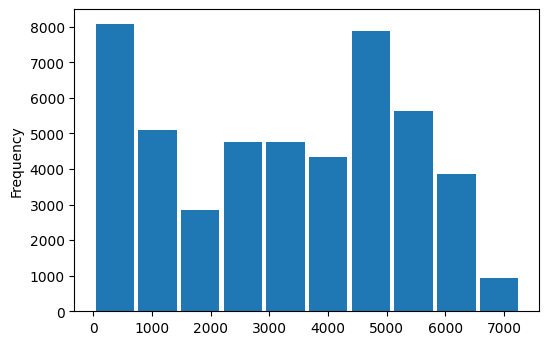

In [51]:
import matplotlib.pyplot as plt
%matplotlib inline

i_94['traffic_volume'].plot.hist(rwidth=0.9)
plt.show()

In [52]:
i_94['traffic_volume'].describe()

count    48204.000000
mean      3259.818355
std       1986.860670
min          0.000000
25%       1193.000000
50%       3380.000000
75%       4933.000000
max       7280.000000
Name: traffic_volume, dtype: float64

We can see that between 2012-10-02 09:00:00 and 2018-09-30 23:00:00, hourly traffic volume varies between 0 and 7,280 cars with the average of 3,260 cars. About 25% of the time, there were 1193 cars or fewer. Another 25% of the time, there were 4933 cars or more, which are around 4 times as much.

## Traffic Volume: Day vs. Night
The possibility that nighttime and daytime might influence traffic volume gives our analysis an interesting direction: comparing daytime with nighttime data. We'll start by dividing the dataset into two parts:
- Daytime data: hours from 7 a.m. to 7 p.m. (12 hours)
- Nighttime data: hours from 7 p.m. to 7 a.m. (12 hours)

While this is not a perfect criterion for distinguishing between nighttime and daytime, it's a good starting point. Since our `date_time` column is currently represented as `object`, we'll transform it to `datetime` using the function `pd.to_datetime()`. We'll then get the hour of every instance of the same column to isolate daytime and nighttime data.

In [53]:
i_94['date_time'] = pd.to_datetime(i_94['date_time'])
i_94_day = i_94.copy()[(i_94['date_time'].dt.hour < 19) & (i_94['date_time'].dt.hour >= 7)]
i_94_night = i_94.copy()[(i_94['date_time'].dt.hour >= 19) | (i_94['date_time'].dt.hour < 7)]

print('Number of daytime data: ', i_94_day.shape[0])
print('Number of nighttime data: ', i_94_night.shape[0])

Number of daytime data:  23877
Number of nighttime data:  24327


Now that we've isolated daytime and nighttime data, we can plot histograms of `traffic_volume` for both of them.

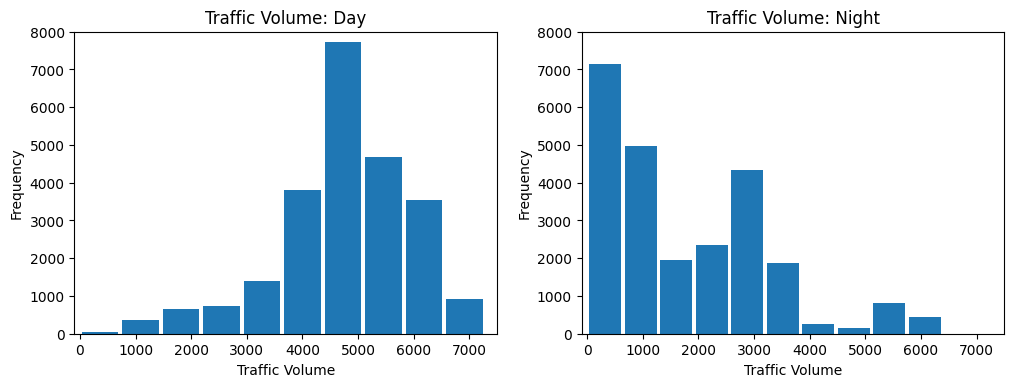

In [54]:
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.hist(i_94_day['traffic_volume'], rwidth=0.9)
plt.xlim(-100, 7500)
plt.ylim(0, 8000)
plt.title('Traffic Volume: Day')
plt.ylabel('Frequency')
plt.xlabel('Traffic Volume')

plt.subplot(1, 2, 2)
plt.hist(i_94_night['traffic_volume'], rwidth=0.9)
plt.xlim(-100, 7500)
plt.ylim(0, 8000)
plt.title('Traffic Volume: Night')
plt.ylabel('Frequency')
plt.xlabel('Traffic Volume')

plt.show()

In [55]:
i_94_day['traffic_volume'].describe()

count    23877.000000
mean      4762.047452
std       1174.546482
min          0.000000
25%       4252.000000
50%       4820.000000
75%       5559.000000
max       7280.000000
Name: traffic_volume, dtype: float64

In [56]:
i_94_night['traffic_volume'].describe()

count    24327.000000
mean      1785.377441
std       1441.951197
min          0.000000
25%        530.000000
50%       1287.000000
75%       2819.000000
max       6386.000000
Name: traffic_volume, dtype: float64

The histogram that shows the distribution of traffic volume during the day is left skewed. This means that most of the traffic volume values are high — there are 4,252 or more cars passing the station each hour 75% of the time (because 25% of values are less than 4,252).

The histogram displaying the nighttime data, on the other hand, is right skewed. This means that most of the traffic volume values are low — 75% of the time, the number of cars that passed the station each hour was less than 2,819. On average, there are 1,785 cars during nighttime which are around one third of average cars during daytime (4,762 cars).

Although there are still measurements of over 5,000 cars per hour, the traffic at night is generally light. Our goal is to find indicators of heavy traffic, so we'll only focus on the daytime data moving forward.

## Time Indicators
One of the possible indicators of heavy traffic is time. There might be more people on the road in a certain month, on a certain day, or at a certain time of the day.

We're going to look at a few line plots showing how the traffic volume changed according to the following parameters:
- Month
- Day of the week
- Time of day

The fastest way to get the average traffic volume for each month is by using the `DataFrame.groupby()` method. In the code below, we'll do the following:
- Use `day['date_time'].dt.month` to create a new column where each value describes the month when the traffic volume measurement was taken.
- Use `day.groupby('month').mean()` to group the dataset by the month column with the mean as an aggregate function.

In [57]:
i_94_day['month'] = i_94_day['date_time'].dt.month
by_month = i_94_day.groupby('month').mean()
by_month['traffic_volume']

month
1     4495.613727
2     4711.198394
3     4889.409560
4     4906.894305
5     4911.121609
6     4898.019566
7     4595.035744
8     4928.302035
9     4870.783145
10    4921.234922
11    4704.094319
12    4374.834566
Name: traffic_volume, dtype: float64

Let's start with generating the plot for the first time unit mentioned above — the month.

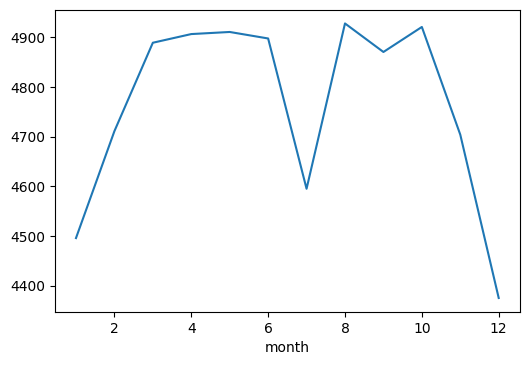

In [60]:
by_month['traffic_volume'].plot()
plt.show()

The traffic looks less heavy during cold months (November–February) and more intense during warm months (March–October), with one interesting exception: July. We'll take a closer look to see if this exception happens every year.

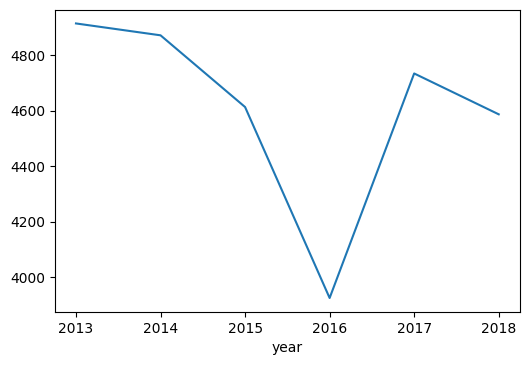

In [61]:
i_94_day['year'] = i_94_day['date_time'].dt.year
only_july = i_94_day[i_94_day['month'] == 7]
only_july.groupby('year').mean()['traffic_volume'].plot()
plt.show()

It turns out that the exception happen only in 2016. All other years show that traffic is still heavy in July. One possible reason for this is road construction — this [article from 2016](https://www.crainsdetroit.com/article/20160728/NEWS/160729841/weekend-construction-i-96-us-23-bridge-work-i-94-lane-closures-i-696) supports this hypothesis.

As a tentative conclusion here, we can say that warm months generally show heavier traffic compared to cold months. In a warm month, you can can expect for each hour of daytime a traffic volume close to 5,000 cars.

Let's generate the plot for the second time unit mentioned above — day of the week.

In [63]:
i_94_day['dayofweek'] = i_94_day['date_time'].dt.dayofweek
by_dayofweek = i_94_day.groupby('dayofweek').mean()
by_dayofweek['traffic_volume']  # 0 is Monday, 6 is Sunday

dayofweek
0    4893.551286
1    5189.004782
2    5284.454282
3    5311.303730
4    5291.600829
5    3927.249558
6    3436.541789
Name: traffic_volume, dtype: float64

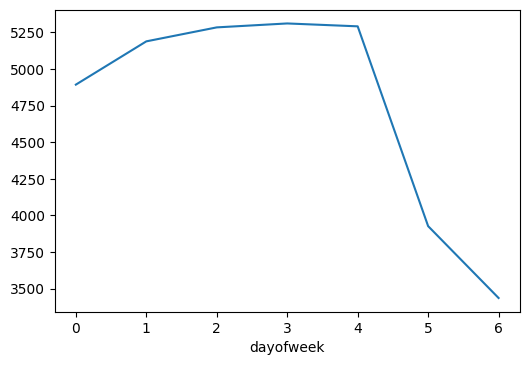

In [64]:
by_dayofweek['traffic_volume'].plot()
plt.show()

We can see that business days (Monday - Friday) have a traffic volume of close to 5,000 cars. In contrast, the traffic volume is below 4,000 cars during weekend which is significantly lower than that of the business days.

We'll now generate a line plot for the time of day. The weekends, however, will drag down the average values, so we're going to look at the averages separately. To do that, we'll start by splitting the data based on the day type: business day or weekend.

In [67]:
i_94_day['hour'] = i_94_day['date_time'].dt.hour
bussiness_days = i_94_day.copy()[i_94_day['dayofweek'] <= 4] # 4 == Friday
weekend = i_94_day.copy()[i_94_day['dayofweek'] >= 5] # 5 == Saturday
by_hour_business = bussiness_days.groupby('hour').mean()
by_hour_weekend = weekend.groupby('hour').mean()

print('Business days')
print(by_hour_business['traffic_volume'])
print('\nWeekend')
print(by_hour_weekend['traffic_volume'])

Business days
hour
7     6030.413559
8     5503.497970
9     4895.269257
10    4378.419118
11    4633.419470
12    4855.382143
13    4859.180473
14    5152.995778
15    5592.897768
16    6189.473647
17    5784.827133
18    4434.209431
Name: traffic_volume, dtype: float64

Weekend
hour
7     1589.365894
8     2338.578073
9     3111.623917
10    3686.632302
11    4044.154955
12    4372.482883
13    4362.296564
14    4358.543796
15    4342.456881
16    4339.693805
17    4151.919929
18    3811.792279
Name: traffic_volume, dtype: float64


Let's generate a line plot for the last indicator - time of the day.

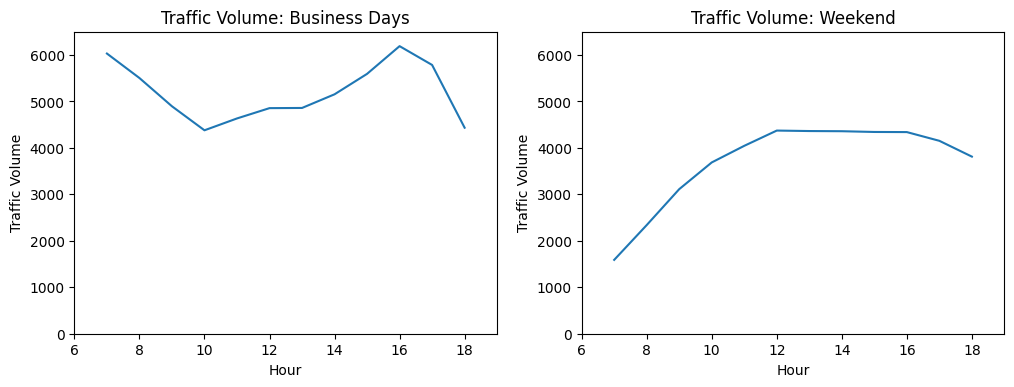

In [74]:
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(by_hour_business['traffic_volume'])
plt.xlim(6, 19)
plt.ylim(0, 6500)
plt.title('Traffic Volume: Business Days')
plt.xlabel('Hour')
plt.ylabel('Traffic Volume')

plt.subplot(1, 2, 2)
plt.plot(by_hour_weekend['traffic_volume'])
plt.xlim(6, 19)
plt.ylim(0, 6500)
plt.title('Traffic Volume: Weekend')
plt.xlabel('Hour')
plt.ylabel('Traffic Volume')

plt.show()

At each hour of the day, the traffic volume is generally higher during business days compared to the weekends. As somehow expected, the rush hours are around 7 and 16 — when most people travel from home to work and back. We see volumes of over 6,000 cars at rush hours.

So far, we reached conclusions regarding a few time-related indicators of heavy traffic:
- The traffic is usually heavier during warm months (March–October) compared to cold months (November–February).
- The traffic is usually heavier on business days compared to weekends.
- On business days, the rush hours are around 7 and 16.

## Weather Indicators
Another possible indicator of heavy traffic is weather. The dataset provides us with a few useful columns about weather: `temp`, `rain_1h`, `snow_1h`, `clouds_all`, `weather_main`, `weather_description`.

A few of these columns are numerical so let's start by looking up their correlation values with `traffic_volume`.

In [86]:
cols = ['temp', 'rain_1h', 'snow_1h', 'clouds_all', 
                   'weather_main', 'weather_description', 'traffic_volume']
i_94_day[cols].corr()['traffic_volume'].sort_values()

clouds_all       -0.032932
snow_1h           0.001265
rain_1h           0.003697
temp              0.128317
traffic_volume    1.000000
Name: traffic_volume, dtype: float64

To find the weather column with the strongest correlation with `traffic_volume`, we'll using absolute value for the correlation.

In [85]:
i_94_day[cols].corr()['traffic_volume'].abs().sort_values(ascending=False)

traffic_volume    1.000000
temp              0.128317
clouds_all        0.032932
rain_1h           0.003697
snow_1h           0.001265
Name: traffic_volume, dtype: float64

The `temp` column has the strongest correlation with `traffic_volume`. So, we'll plot a scatter plot of temperature and traffic volume.

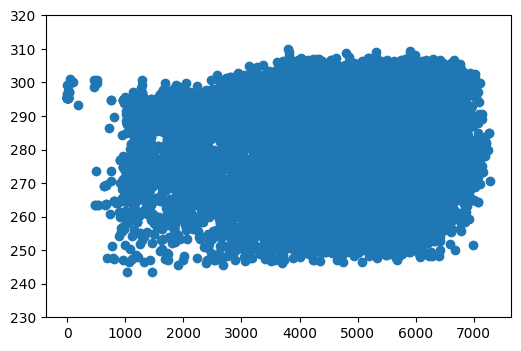

In [89]:
plt.scatter(i_94_day['traffic_volume'], i_94_day['temp'])
plt.ylim(230, 320) # two wrong 0K temperatures mess up the y-axis
plt.show()

From the scatter plot above, temperature doesn't seem like a reliable indicator of heavy traffic.

Let's now look at the other weather-related columns: `weather_main` and `weather_description`.

## Weather Types
To start, we're going to group the data by `weather_main` and look at the `traffic_volume` averages using horizontal bar plot.

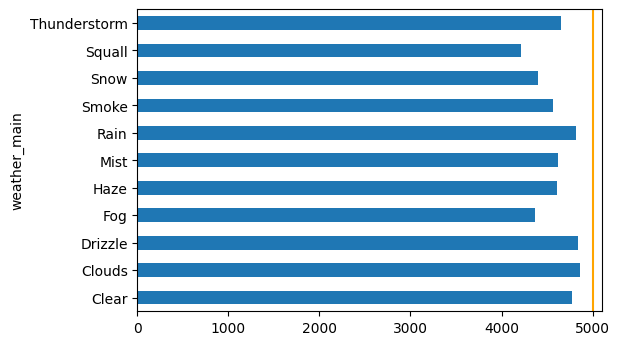

In [95]:
by_weather_main = i_94_day.groupby('weather_main').mean()
by_weather_main['traffic_volume'].plot.barh()
plt.axvline(x = 5000, color = 'orange')
plt.show()

It looks like there's no weather type where traffic volume exceeds 5,000 cars. This makes finding a heavy traffic indicator more difficult. Let's also group by `weather_description`, which has a more granular weather classification.

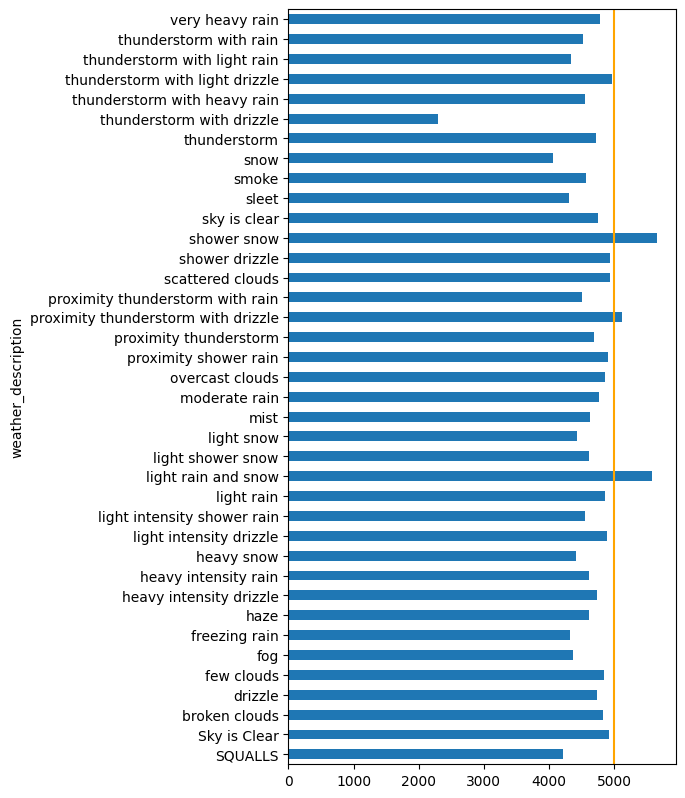

In [96]:
by_weather_description = i_94_day.groupby('weather_description').mean()
by_weather_description['traffic_volume'].plot.barh(figsize=(5,10))
plt.axvline(x = 5000, color = 'orange')
plt.show()

It looks like there are three weather types where traffic volume exceeds 5,000:
- Shower snow
- Light rain and snow
- Proximity thunderstorm with drizzle

It's not clear why these weather types have the highest average traffic values — this is bad weather, but not that bad. Perhaps more people take their cars out of the garage when the weather is bad instead of riding a bike or walking.

## Conclusions
In this project, we tried to find a few indicators of heavy traffic on the I-94 Interstate highway. We managed to find two types of indicators:
- Time indicators
    - The traffic is usually heavier during warm months (March–October) compared to cold months (November–February).
    - The traffic is usually heavier on business days compared to the weekends.
    - On business days, the rush hours are around 7 and 16.
- Weather indicators
    - Shower snow
    - Light rain and snow
    - Proximity thunderstorm with drizzle